In [15]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import time


CANDLES_PATH = './Data/candles.csv'

days_to_subtract = 3
sec='SBER'
fut=r'SR.3'
multiplier=100

df = pd.read_csv(CANDLES_PATH, sep='\t')
df['t'] = pd.to_datetime(df['datetime'], format='%d.%m.%Y %H:%M')
start_date = datetime.today() - timedelta(days=days_to_subtract)
df = df[df['t'] > np.datetime64(start_date)]
df

,datetime,open,close,high,low,volume,security,class_code,t
321401,20.03.2023 09:00,81969.0000,81964.0000,81969.0000,81883.0000,162,EuM3,SPBFUT,2023-03-20 09:00:00
321402,20.03.2023 09:00,74.3000,73.8700,74.3000,73.8600,2978,BRJ3,SPBFUT,2023-03-20 09:00:00
321403,20.03.2023 09:00,12372.0000,12365.0000,12377.0000,12364.0000,144,NAM3,SPBFUT,2023-03-20 09:00:00
321404,20.03.2023 09:00,1705.0000,1731.0000,1748.0000,1705.0000,7915,VBM3,SPBFUT,2023-03-20 09:00:00
321405,20.03.2023 09:00,11.3480,11.3060,11.3480,11.2910,42167,CRM3,SPBFUT,2023-03-20 09:00:00
...,...,...,...,...,...,...,...,...,...
486768,22.03.2023 23:49,1.0742,1.0742,1.0743,1.0742,19,EDM3,SPBFUT,2023-03-22 23:49:00
486769,22.03.2023 23:49,13.7540,13.7500,13.7540,13.7500,447,AFKS,TQBR,2023-03-22 23:49:00
486770,22.03.2023 23:49,392.3000,392.5900,392.6100,392.3000,67,SFM3,SPBFUT,2023-03-22 23:49:00
486771,22.03.2023 23:49,5665.0000,5672.0000,5672.0000,5665.0000,22,POM3,SPBFUT,2023-03-22 23:49:00


In [16]:
df_filter = df[(df['security'].str.match(fut)) | (df['security']==sec)]
df_filter

,datetime,open,close,high,low,volume,security,class_code,t
321408,20.03.2023 09:00,17773.00,17878.00,17895.00,17710.00,2936,SRM3,SPBFUT,2023-03-20 09:00:00
321416,20.03.2023 09:00,17913.00,17976.00,17976.00,17896.00,245,SRU3,SPBFUT,2023-03-20 09:00:00
321426,20.03.2023 09:01,17879.00,17843.00,17887.00,17829.00,1203,SRM3,SPBFUT,2023-03-20 09:01:00
321449,20.03.2023 09:01,17977.00,17961.00,17979.00,17961.00,10,SRU3,SPBFUT,2023-03-20 09:01:00
321453,20.03.2023 09:02,17843.00,17830.00,17850.00,17830.00,514,SRM3,SPBFUT,2023-03-20 09:02:00
...,...,...,...,...,...,...,...,...,...
486646,22.03.2023 23:47,18598.00,18597.00,18600.00,18595.00,45,SRM3,SPBFUT,2023-03-22 23:47:00
486675,22.03.2023 23:48,202.90,202.89,202.91,202.87,4990,SBER,TQBR,2023-03-22 23:48:00
486711,22.03.2023 23:48,18597.00,18595.00,18601.00,18595.00,52,SRM3,SPBFUT,2023-03-22 23:48:00
486725,22.03.2023 23:49,18596.00,18592.00,18604.00,18592.00,120,SRM3,SPBFUT,2023-03-22 23:49:00


In [17]:
df_filter=df_filter[['t','security','open']].drop_duplicates()
df_pivot=df_filter.pivot(index='t', columns='security', values='open').dropna().reset_index()
df_pivot[sec]*=multiplier
df_pivot

security,t,SBER,SRM3,SRU3
0,2023-03-20 09:59:00,19602.0,17918.0,18143.0
1,2023-03-20 10:00:00,19603.0,17928.0,18160.0
2,2023-03-20 10:01:00,19651.0,17999.0,18216.0
3,2023-03-20 10:02:00,19761.0,18061.0,18296.0
4,2023-03-20 10:03:00,19800.0,18086.0,18303.0
...,...,...,...,...
1293,2023-03-22 23:35:00,20304.0,18596.0,18871.0
1294,2023-03-22 23:36:00,20306.0,18614.0,18865.0
1295,2023-03-22 23:37:00,20309.0,18616.0,18862.0
1296,2023-03-22 23:38:00,20307.0,18609.0,18860.0


security,t,SBER,SRM3,SRU3,dSRM3,dSRU3
0,2023-03-20 09:59:00,19602.0,17918.0,18143.0,-1684.0,-1459.0
1,2023-03-20 10:00:00,19603.0,17928.0,18160.0,-1675.0,-1443.0
2,2023-03-20 10:01:00,19651.0,17999.0,18216.0,-1652.0,-1435.0
3,2023-03-20 10:02:00,19761.0,18061.0,18296.0,-1700.0,-1465.0
4,2023-03-20 10:03:00,19800.0,18086.0,18303.0,-1714.0,-1497.0
...,...,...,...,...,...,...
1293,2023-03-22 23:35:00,20304.0,18596.0,18871.0,-1708.0,-1433.0
1294,2023-03-22 23:36:00,20306.0,18614.0,18865.0,-1692.0,-1441.0
1295,2023-03-22 23:37:00,20309.0,18616.0,18862.0,-1693.0,-1447.0
1296,2023-03-22 23:38:00,20307.0,18609.0,18860.0,-1698.0,-1447.0


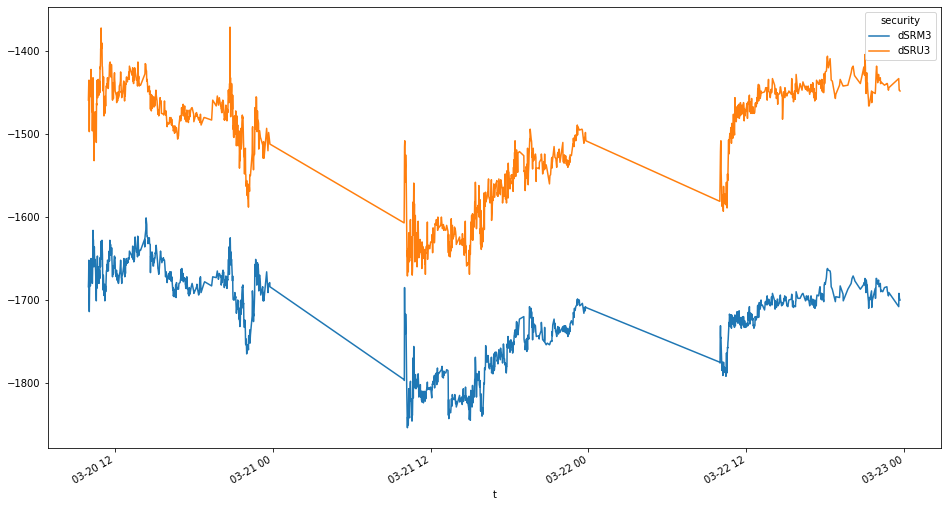

In [18]:
fut_list=set(df_pivot.columns) - set([sec,'t'])
diff_list=[]
for fut in fut_list:
    df_pivot[('d'+fut)] = df_pivot[fut] - df_pivot[sec]  
    diff_list.append(('d'+fut))
    
df_pivot[diff_list+['t']].set_index('t').plot(figsize=(16,9))
df_pivot